In [56]:
from analyze import *
import os

# look through flight_data folder for files containing "aug" (lowercase or uppercase)
# and print out the file names with numbers
files = [f for f in os.listdir("flight_data") if "sep4" in f.lower() or "sepaa" in f.lower()]
for i, f in enumerate(files):
    print(i, f)

0 Sep4_5inch_icra_5inch_20percent_randomized_3_3succesfull_runs.csv
1 Sep4_5inch_icra_big_domain_randomization_2_2succes_1fail.csv
2 Sep4_5inch_icra_5inch_10percent_randomized_2_runs_succesful.csv
3 Sep4_5inch_icra_5inch_0percent_randomized_crash2.csv
4 Sep4_5inch_icra_5inch_0percent_randomized_crash1.csv
5 Sep4_5inch_icra_big_domain_randomization_3_3succesfull_runs.csv
6 Sep4_5inch_icra_5inch_10percent_randomized_1_runs_succesful.csv
7 Sep4_5inch_icra_5inch_30percent_randomized_3_3succesfull_runs.csv
8 Sep4_tills_drone_icra_big_randomization_6_roll_stiffness_1.csv
9 Sep4_5inch_icra_5inch_10percent_randomized_1_run_robins_fat_fingers.csv
10 Sep4_5inch_icra_5inch_0percent_randomized_crash3.csv
11 Sep4_tills_drone_icra_big_randomization_6_roll_stiffness_2.csv


In [135]:
# select a file by number
# num = 3
# file = files[num]
# print("Selected file:", file)

# load the data
# data = load_flight_data("flight_data/" + file, new_format=True)

def trim_nn_active(data):
    indices = data['flightModeFlags'] > 8000
    data = {k: v[indices] for k, v in data.items() if isinstance(v, np.ndarray) and len(v) == len(indices)}
    data['t'] = data['t'] - data['t'][0]
    return data

def trim_time(data, t0=0, tf=12):
    indices = (data['t'] >= t0) & (data['t'] <= tf)
    try:
        # add one more data point to make sure that t=tf is included
        i = np.min(np.where(data['t']>tf)[0])
        indices[i] = True
    except:
        print("Warning: tf is greater than the last time point")
    data = {k: v[indices] for k, v in data.items() if isinstance(v, np.ndarray) and len(v) == len(indices)}
    data['t'] = data['t'] - data['t'][0]
    return data

def split_where_nn_active(data):
    # plt.plot(data['flightModeFlags'])
    # plt.show()
    nn_active = data['flightModeFlags'] > 8000
    nn_activate = [i for i in range(1, len(nn_active)) if nn_active[i] and not nn_active[i-1]]
    nn_deactivate = [i for i in range(1, len(nn_active)) if not nn_active[i] and nn_active[i-1]]
    # make sure nn_activate and nn_deactivate are the same length
    if len(nn_activate) > len(nn_deactivate):
        nn_deactivate.append(len(nn_active))
    split_data = []
    for i in range(len(nn_activate)):
        split_data.append({k: v[nn_activate[i]:nn_deactivate[i]] for k, v in data.items() if isinstance(v, np.ndarray) and len(v) == len(data['t'])})
        split_data[-1]['t'] = split_data[-1]['t'] - split_data[-1]['t'][0]
    return split_data
    

# trim the data
# data = trim_nn_active(data)

In [136]:
# animate
# race track
r = 1.5
gate_pos = np.array([
    [ r,  -r, -1.5],
    [ 0,   0, -1.5],
    [-r,   r, -1.5],
    [ 0, 2*r, -1.5],
    [ r,   r, -1.5],
    [ 0,   0, -1.5],
    [-r,  -r, -1.5],
    [ 0,-2*r, -1.5]
])
gate_yaw = np.array([1,2,1,0,-1,-2,-1,0])*np.pi/2

# animate_data_multiple(data, gate_pos=gate_pos, gate_yaw=gate_yaw)

## Comparison of all flights

In [137]:
# 3INCH DRONE----------------------------------------------------------------------------
# 3inch big randomization
data = load_flight_data("flight_data/Sep5_3inch_big_randomization_3runs_succesful.csv")
runs = split_where_nn_active(data)
runs_3inch_big_domain_randomization = [trim_time(r, t0=0, tf=12) for r in runs]
print(runs_3inch_big_domain_randomization[0]['t'][-1])

# 3inch 30 percent randomization
data = load_flight_data("flight_data/Sep5_3inch_30percent_randomized_3runs_succesful.csv")
runs = split_where_nn_active(data)
runs_3inch_30percent_randomization = [trim_time(r, t0=0, tf=12) for r in runs]

# 3inch 20 percent randomization
data = load_flight_data("flight_data/Sep5_3inch_20percent_randomized_3runs_succesful.csv")
runs = split_where_nn_active(data)
runs_3inch_20percent_randomization = [trim_time(r, t0=0, tf=12) for r in runs]

# 3inch 10 percent randomization
data = load_flight_data("flight_data/Sep5_3inch_10percent_randomized_3runs_succesful.csv")
runs = split_where_nn_active(data)
runs_3inch_10percent_randomization = [trim_time(r, t0=0, tf=12) for r in runs]

# 3inch 0 percent randomization
data1 = load_flight_data("flight_data/Sep5_3inch_0percent_randomized_2runs_succesful_1_optitrack_loss.csv")
data2 = load_flight_data("flight_data/Sep5_3inch_0percent_randomized_1runs_succesful.csv")
runs = split_where_nn_active(data1)
# remove the last run because it's not a full run (optitrack loss)
runs = runs[:-1]
# append the last run
runs.append(split_where_nn_active(data2)[0])
runs_3inch_0percent_randomization = [trim_time(r, t0=0, tf=12) for r in runs]

# 5INCH DRONE----------------------------------------------------------------------------
# 5inch big randomization
data = load_flight_data("flight_data/Sep4_5inch_icra_big_domain_randomization_3_3succesfull_runs.csv")
runs = split_where_nn_active(data)
runs_5inch_big_domain_randomization = [trim_time(r, t0=0, tf=12) for r in runs]

# 5inch 30 percent randomization
data = load_flight_data("flight_data/Sep4_5inch_icra_5inch_30percent_randomized_3_3succesfull_runs.csv")
runs = split_where_nn_active(data)
runs_5inch_30percent_randomization = [trim_time(r, t0=0, tf=12) for r in runs]

# 5inch 20 percent randomization
data = load_flight_data("flight_data/Sep4_5inch_icra_5inch_20percent_randomized_3_3succesfull_runs.csv")
runs = split_where_nn_active(data)
runs_5inch_20percent_randomization = [trim_time(r, t0=0, tf=12) for r in runs]

# 5inch 10 percent randomization
data1 = load_flight_data("flight_data/Sep4_5inch_icra_5inch_10percent_randomized_2_runs_succesful.csv")
data2 = load_flight_data("flight_data/Sep4_5inch_icra_5inch_10percent_randomized_1_runs_succesful.csv")
runs = split_where_nn_active(data1)[0:2]
runs.append(split_where_nn_active(data2)[0])
runs_5inch_10percent_randomization = [trim_time(r, t0=0, tf=12) for r in runs]

# 5inch 0 percent randomization
data1 = load_flight_data("flight_data/Sep4_5inch_icra_5inch_0percent_randomized_crash1.csv")
data2 = load_flight_data("flight_data/Sep4_5inch_icra_5inch_0percent_randomized_crash2.csv")
data3 = load_flight_data("flight_data/Sep4_5inch_icra_5inch_0percent_randomized_crash3.csv")
runs = [split_where_nn_active(data1)[0], split_where_nn_active(data2)[0], split_where_nn_active(data3)[0]]
runs_5inch_0percent_randomization = [trim_time(r, t0=0, tf=12) for r in runs]

Loading flight_data/Sep5_3inch_big_randomization_3runs_succesful.csv
Logging frequency: 906.2990724728469
12.000248999999997
Loading flight_data/Sep5_3inch_30percent_randomized_3runs_succesful.csv
Logging frequency: 881.7974382601424
Loading flight_data/Sep5_3inch_20percent_randomized_3runs_succesful.csv
Logging frequency: 872.9291493196605
Loading flight_data/Sep5_3inch_10percent_randomized_3runs_succesful.csv
Logging frequency: 902.7468512313426
Loading flight_data/Sep5_3inch_0percent_randomized_2runs_succesful_1_optitrack_loss.csv
Logging frequency: 880.4374784409089
Loading flight_data/Sep5_3inch_0percent_randomized_1runs_succesful.csv
Logging frequency: 875.9575368790433
Loading flight_data/Sep4_5inch_icra_big_domain_randomization_3_3succesfull_runs.csv
Logging frequency: 927.5923996154623
Loading flight_data/Sep4_5inch_icra_5inch_30percent_randomized_3_3succesfull_runs.csv
Logging frequency: 896.8315739388388
Loading flight_data/Sep4_5inch_icra_5inch_20percent_randomized_3_3succe

/home/robinferede/Git/analyze_flight_data/analyze.py:138: RuntimeWarning: invalid value encountered in arcsin
  data['theta'] = np.arcsin(2*(data['qw']*data['qy'] - data['qz']*data['qx']))


Loading flight_data/Sep4_5inch_icra_5inch_10percent_randomized_2_runs_succesful.csv
Logging frequency: 953.496203382087
Loading flight_data/Sep4_5inch_icra_5inch_10percent_randomized_1_runs_succesful.csv
Logging frequency: 990.4674567572033
Loading flight_data/Sep4_5inch_icra_5inch_0percent_randomized_crash1.csv
Logging frequency: 943.4450292555804
Loading flight_data/Sep4_5inch_icra_5inch_0percent_randomized_crash2.csv
Logging frequency: 947.9262068713646
Loading flight_data/Sep4_5inch_icra_5inch_0percent_randomized_crash3.csv
Logging frequency: 939.8871644874367


ValueError: zero-size array to reduction operation minimum which has no identity

In [110]:
# runs = runs_3inch_big_domain_randomization + runs_3inch_30percent_randomization + runs_3inch_20percent_randomization + runs_3inch_10percent_randomization + runs_3inch_0percent_randomization
# names = ["big"]*3 + ["30%"]*3 + ["20%"]*3 + ["10%"]*3 + ["0%"]*3
# colors = [(255,0,0)]*3 + [(0,255,0)]*3 + [(0,0,255)]*3 + [(0,255,255)]*3 + [(0,0,0)]*3
# animate_data_multiple(*runs, gate_pos=gate_pos, gate_yaw=gate_yaw, names=names, colors=colors)

# runs = runs_5inch_big_domain_randomization + runs_5inch_30percent_randomization + runs_5inch_20percent_randomization + runs_5inch_10percent_randomization + runs_5inch_0percent_randomization
# names = ["big"]*3 + ["30%"]*3 + ["20%"]*3 + ["10%"]*3 + ["0%"]*3
# colors = [(255,0,0)]*3 + [(0,255,0)]*3 + [(0,0,255)]*3 + [(0,255,255)]*3 + [(0,0,0)]*3
# animate_data_multiple(*runs, gate_pos=gate_pos, gate_yaw=gate_yaw, names=names, colors=colors)

animate_data_multiple(*runs_5inch_10percent_randomization, gate_pos=gate_pos, gate_yaw=gate_yaw, names=['run1', 'run2', 'run3'])

In [111]:
run = runs_3inch_30percent_randomization[0]

# down sample the data
def down_sample(run, freq):
    # subsample the data so it is freq Hz
    t = run['t']
    indices = [0]
    i = 1
    for j in range(1, len(t)):
        if t[j] >= i/freq:
            indices.append(j)
            i += 1
    # printing
    for i in range(len(indices)):
        print(t[indices[i]], '==', i/freq)
        # check if t[indices[i]] rounded to 2 decimal places is equal to i/freq
        if round(t[indices[i]], 2) != round(i/freq, 2):
            print('ERROR')
            print(t[indices])
            print(t[indices[i]], '!=', i/freq)
    run = {k: v[indices] for k, v in run.items() if isinstance(v, np.ndarray) and len(v) == len(t)}
    return run
    
# get episode reward
def get_episode_reward(run, gate_pos, gate_yaw):
    # down sample to 100 Hz to match simulation
    run = down_sample(run, freq=100)
    
    # position
    x, y, z = run['ekf_x'], run['ekf_y'], run['ekf_z']
    pos = np.array([x, y, z]).T
    # body rates
    p, q, r = run['p'], run['q'], run['r']
    rates = np.array([p, q, r]).T
    # target gate
    target_gate = 0
    
    # we will log the following
    pos_list = []
    reward_list = []
    done_list = []
    gate_passed_list = []
    gate_missed_list = []
    
    # run through the data
    for i in range(1, len(pos)):
        pos_old = pos[i-1]
        pos_new = pos[i]
        pos_gate = gate_pos[target_gate]
        yaw_gate = gate_yaw[target_gate]
        
        d2g_old = np.linalg.norm(pos_old - pos_gate)
        d2g_new = np.linalg.norm(pos_new - pos_gate)
        
        reward = d2g_old - d2g_new                  # progress reward
        reward += -0.001*np.linalg.norm(rates[i])   # rate penalty
        
        # gate passing/collision
        normal = [np.cos(gate_yaw[target_gate]), np.sin(gate_yaw[target_gate])]
        pos_old_projected = (pos_old[0]-pos_gate[0])*normal[0] + (pos_old[1]-pos_gate[1])*normal[1]
        pos_new_projected = (pos_new[0]-pos_gate[0])*normal[0] + (pos_new[1]-pos_gate[1])*normal[1]
        passed_gate_plane = (pos_old_projected < 0) and (pos_new_projected > 0)
        gate_size = 1.5
        gate_passed = passed_gate_plane and np.all(np.abs(pos_new - pos_gate) < gate_size/2)
        gate_missed = passed_gate_plane and np.any(np.abs(pos_new - pos_gate) > gate_size/2)
        
        # ground collision penalty (z>0)
        ground_collision = pos_new[2] > 0
        if ground_collision:
            reward -= 10
        
        # check out of bounds
        out_of_bounds = np.any(np.abs(pos_new[0:2]) > 5)    # edges of the grid
        out_of_bounds |= pos_new[2] < -7.5                  # max height (z-axis points down)
        out_of_bounds |= np.any(np.abs(rates[i]) > 1000)    # max rate (prevent numerical issues)
        if out_of_bounds:
            reward -= 10
            
        # check number of steps
        max_steps_reached = i >= 1200
        
        # update target gate
        if gate_passed:
            target_gate += 1
            target_gate %= len(gate_pos)
        
        # check if episode is done
        done = max_steps_reached or ground_collision or out_of_bounds or gate_missed
        
        # log
        pos_list.append(pos_new)
        reward_list.append(reward)
        done_list.append(done)
        gate_passed_list.append(gate_passed)
        gate_missed_list.append(gate_missed)
    
    # convert to numpy arrays
    pos = np.array(pos_list)
    rewards = np.array(reward_list)
    dones = np.array(done_list)
    gate_passed = np.array(gate_passed_list)
    gate_missed = np.array(gate_missed_list)
    
    # compute episode reward
    terminal_step = min(np.where(dones)[0])
    ep_reward = np.sum(rewards[:terminal_step+1])
    
    # # print out the results for debugging
    # for i in range(len(rewards)):
    #     print('step:', i, 'reward:', rewards[i], 'done:', dones[i], 'gate_passed:', gate_passed[i], 'gate_missed:', gate_missed[i])
    #     if dones[i]:
    #         print('---------------done---------------')
    
    # print('--------')
    # print('ep_reward=', ep_reward)
    # print('num_gates_passed=', np.sum(gate_passed_list), 'num_gates_missed=', np.sum(gate_missed_list))
    
    info = {
        't': run['t'],
        'pos': pos,
        'rewards': rewards,
        'dones': dones,
        'gates_passed': gate_passed,
        'gates_missed': gate_missed,
        'terminal_step': terminal_step
    }
    
    return ep_reward, info

get_episode_reward(runs_5inch_10percent_randomization[2], gate_pos, gate_yaw)

0.0 == 0.0
0.010097000000001799 == 0.01
0.0201929999999777 == 0.02
0.0302899999999795 == 0.03
0.040385999999983824 == 0.04
0.05048299999998562 == 0.05
0.06057999999998742 == 0.06
0.07067599999999175 == 0.07
0.08077199999999607 == 0.08
0.09086899999999787 == 0.09
0.10096500000000219 == 0.1
0.11005199999999604 == 0.11
0.12014899999999784 == 0.12
0.13024500000000216 == 0.13
0.14034300000000144 == 0.14
0.15043799999997987 == 0.15
0.16053499999998166 == 0.16
0.170630999999986 == 0.17
0.1807279999999878 == 0.18
0.1908239999999921 == 0.19
0.20091999999999643 == 0.2
0.21000799999998776 == 0.21
0.22010399999999208 == 0.22
0.2301999999999964 == 0.23
0.2402969999999982 == 0.24
0.2503929999999741 == 0.25
0.2604899999999759 == 0.26
0.27058599999998023 == 0.27
0.28068199999998455 == 0.28
0.29077899999998635 == 0.29
0.3008749999999907 == 0.3
0.3109719999999925 == 0.31
0.3200589999999863 == 0.32
0.33015499999999065 == 0.33
0.34025199999999245 == 0.34
0.3503479999999968 == 0.35
0.36044499999999857 == 0

(23.717344910487668,
 {'t': array([0.0000000e+00, 1.0097000e-02, 2.0193000e-02, ..., 1.1970833e+01,
         1.1980929e+01, 1.1990015e+01]),
  'pos': array([[ 1.495, -2.479, -1.518],
         [ 1.495, -2.479, -1.519],
         [ 1.495, -2.479, -1.519],
         ...,
         [-1.173, -1.192, -1.792],
         [-1.186, -1.275, -1.782],
         [-1.194, -1.359, -1.77 ]]),
  'rewards': array([-0.00030582, -0.00176173, -0.00384953, ...,  0.05877344,
          0.05146781,  0.04019288]),
  'dones': array([False, False, False, ..., False, False, False]),
  'gates_passed': array([False, False, False, ..., False, False, False]),
  'gates_missed': array([False, False, False, ..., False, False, False]),
  'terminal_step': 617})

In [100]:
import matplotlib as mpl
import matplotlib.cm as cm
norm = mpl.colors.Normalize(0,13)
cmap = cm.jet 

def color_plot(ax, x_axis,y_axis,color_axis,step=1, **kwargs):
    for i in reversed(range(step,len(x_axis),step)):
        # ax.plot([x_axis[i-step], x_axis[i]],[y_axis[i-step], y_axis[i]], color=cmap(norm(color_axis[i])))
        ax.plot(x_axis[i-step:i+1], y_axis[i-step:i+1], color=cmap(norm(np.mean(color_axis[i-step:i+1]))), **kwargs)


def xy_plot(ax, data, title):
    ep_reward, info = get_episode_reward(data, gate_pos, gate_yaw)
    t = data['t']
    t_f = info['t'][info['terminal_step']]
    color_plot(ax, data['ekf_y'][t<t_f], data['ekf_x'][t<t_f], data['v'][t<t_f], step=10)
    color_plot(ax, data['ekf_y'][t>=t_f], data['ekf_x'][t>=t_f], data['v'][t>=t_f], step=10, alpha=0.2)
    for i in range(len(gate_pos)):
        x, y, z = gate_pos[i]
        yaw = gate_yaw[i]
        ax.plot([y-np.cos(yaw)*0.75, y+np.cos(yaw)*0.75], [x-np.sin(yaw)*0.75, x+np.sin(yaw)*0.75], color='black')
    
    # add a dot at the start
    ax.plot(data['ekf_y'][0], data['ekf_x'][0], 'ko')
    ax.text(data['ekf_y'][0], data['ekf_x'][0], 'start', ha='right', va='bottom', color='black', fontsize=15) #, fontweight='bold')
    # add an x at the end (terminal step)
    end = info['pos'][info["terminal_step"]]
    ax.plot(end[1], end[0], 'kx')
    ax.text(end[1], end[0], 'end', ha='right', va='bottom', color='black', fontsize=15) #, fontweight='bold')
    # axis limits
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_aspect('equal', 'box')
    
    # extra info
    title += "\n"
    title += f'episode reward: {ep_reward:.2f} episode length: {info["terminal_step"]+1}\n'
    title += f'gates passed: {np.sum(info["gates_passed"])}\n'
    title += f'mean velocity: {np.mean(data["v"]):.2f} m/s    max velocity: {np.max(data["v"]):.2f} m/s'
    ax.set_title(title)

/tmp/ipykernel_108724/3022525414.py:61: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


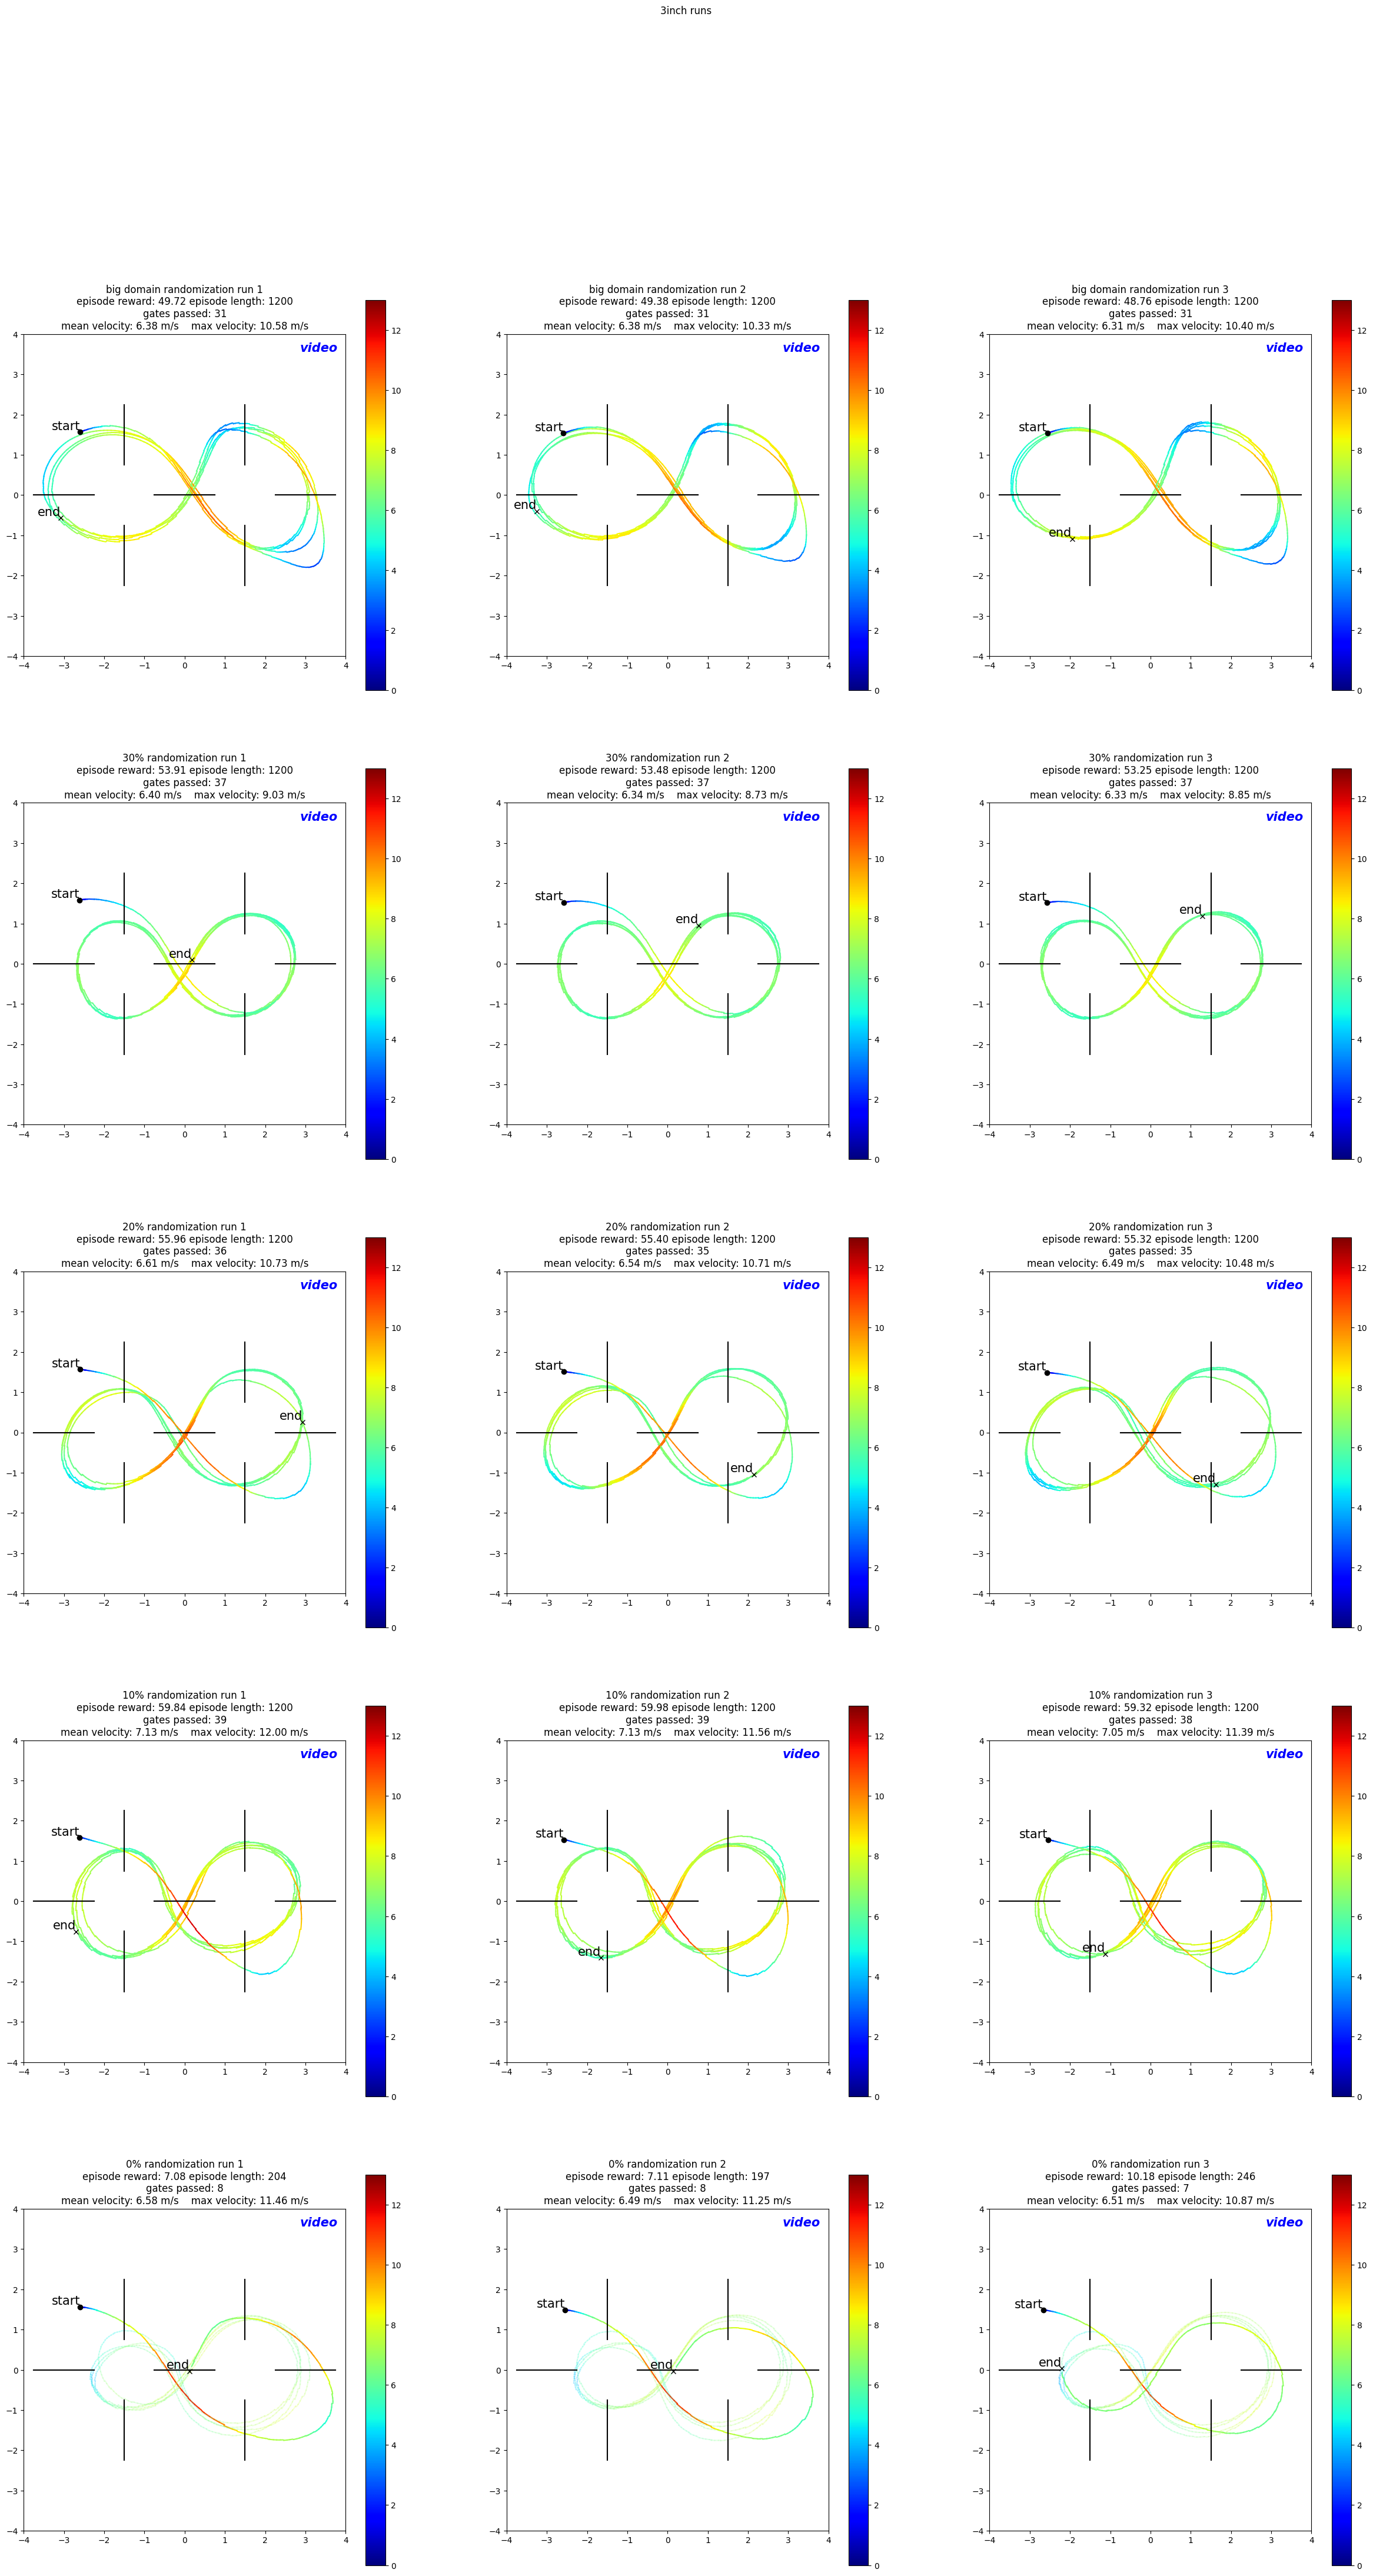

In [101]:
fig, axs = plt.subplots(5, 3, figsize=(30, 50))
run1, run2, run3 = runs_3inch_big_domain_randomization
# add link to the plot
xy_plot(axs[0, 0], run1, "big domain randomization run 1")
xy_plot(axs[0, 1], run2, "big domain randomization run 2")
xy_plot(axs[0, 2], run3, "big domain randomization run 3")
run1, run2, run3 = runs_3inch_30percent_randomization
xy_plot(axs[1, 0], run1, "30% randomization run 1")
xy_plot(axs[1, 1], run2, "30% randomization run 2")
xy_plot(axs[1, 2], run3, "30% randomization run 3")
run1, run2, run3 = runs_3inch_20percent_randomization
xy_plot(axs[2, 0], run1, "20% randomization run 1")
xy_plot(axs[2, 1], run2, "20% randomization run 2")
xy_plot(axs[2, 2], run3, "20% randomization run 3")
run1, run2, run3 = runs_3inch_10percent_randomization
xy_plot(axs[3, 0], run1, "10% randomization run 1")
xy_plot(axs[3, 1], run2, "10% randomization run 2")
xy_plot(axs[3, 2], run3, "10% randomization run 3")
run1, run2, run3 = runs_3inch_0percent_randomization
xy_plot(axs[4, 0], run1, "0% randomization run 1")
xy_plot(axs[4, 1], run2, "0% randomization run 2")
xy_plot(axs[4, 2], run3, "0% randomization run 3")

# title
fig.suptitle("3inch runs")

# colorbar
# put a little colorbar in each of the subplots
for ax in axs.flat:
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, orientation='vertical')
    

# video links
def put_video_link(ax, url):
    ax.text(3.8, 3.8, "video", ha='right', va='top', color='blue', fontsize=15, fontweight='bold', url=url, style='italic')
# big domain randomization
put_video_link(axs[0, 0], 'https://drive.google.com/file/d/1qi5rHTiVVHbStaDV_8FeqSuZa-LjPMO6/view?usp=drive_link')
put_video_link(axs[0, 1], 'https://drive.google.com/file/d/11rccHP-cuZqREgo-A7MqPAEE_m4EXgkr/view?usp=drive_link')
put_video_link(axs[0, 2], 'https://drive.google.com/file/d/1TZQNbaPlCEHpLTZlhw0sfanHtNCFLjMg/view?usp=drive_link')
# 30% randomization
put_video_link(axs[1, 0], 'https://drive.google.com/file/d/1UuJooN7pGl1VofRSYqdXXwIVJtP-ae0S/view?usp=drive_link')
put_video_link(axs[1, 1], 'https://drive.google.com/file/d/1dfamUlCA_2PRB-el0Rg4rzT_eeX39V3n/view?usp=drive_link')
put_video_link(axs[1, 2], 'https://drive.google.com/file/d/1hTC0PX_HvSzBGFLEWbms5JcWNResQ4DG/view?usp=drive_link')
# 20% randomization
put_video_link(axs[2, 0], 'https://drive.google.com/file/d/1IfIxb4E4YcjQzKfAhxup3SkOf_atmDDM/view?usp=drive_link')
put_video_link(axs[2, 1], 'https://drive.google.com/file/d/1iOd1Rk2IznPKp2BCGmEuWHPnIIA4RSIe/view?usp=drive_link')
put_video_link(axs[2, 2], 'https://drive.google.com/file/d/1BfbuLpx9-uP3O_hbFFQYnl8GpVoNy_Vs/view?usp=drive_link')
# 10% randomization
put_video_link(axs[3, 0], 'https://drive.google.com/file/d/1LPCDDsEf5GIb5FoRW7TOrLVg864C_Z54/view?usp=drive_link')
put_video_link(axs[3, 1], 'https://drive.google.com/file/d/113Ivb4Mw97gJDd2R8sltwtQZYHPJWUth/view?usp=drive_link')
put_video_link(axs[3, 2], 'https://drive.google.com/file/d/1-4K5qly-CHaF7_Adj72nC2WL0lKggwJv/view?usp=drive_link')
# 0% randomization
put_video_link(axs[4, 0], 'https://drive.google.com/file/d/1L98ug0LqWAZpczYZEWuWJfbHzkFTJ-GH/view?usp=drive_link')
put_video_link(axs[4, 1], 'https://drive.google.com/file/d/1bUU9P3abpwvYREU_oTVAsgDOlAj5tash/view?usp=drive_link')
put_video_link(axs[4, 2], 'https://drive.google.com/file/d/1D16y9wHQakob540eoniHPVVR2wfZZdkA/view?usp=drive_link')

# save
fig.savefig("figures/3inch_runs.pdf")
fig.show()


ERROR
[0.       0.010108 0.020207 0.030303 0.040399 0.050495 0.060591 0.070687
 0.080783 0.090878 0.100974 0.11107  0.121166 0.131262 0.140096 0.150192
 0.160288 0.170384 0.180479 0.190575 0.200671 0.210767 0.220863 0.230959
 0.241055 0.251151 0.261246 0.27008  0.280176 0.290272 0.300368 0.310464
 0.320559 0.330656 0.340751 0.350847 0.360943 0.371038 0.381134 0.39123
 0.400064 0.41016  0.420255 0.430351 0.440447 0.450543 0.460638 0.470734
 0.48083  0.490926 0.501021 0.511117 0.521213 0.530046 0.540142 0.550238
 0.560334 0.57043  0.580525 0.590621 0.600716 0.610812 0.620908 0.631004
 0.641099 0.651195 0.660029 0.670127 0.680221 0.690316 0.700412 0.710507
 0.720603 0.730699 0.740795 0.75089  0.760986 0.771082 0.781178 0.790011
 0.800107 0.810203 0.820299 0.830395 0.84049  0.850586 0.860682 0.87078
 0.880873 0.890969 0.901065 0.911161 0.921257 0.93009  0.940186 0.950282
 0.960378 0.970473 0.980569 0.990665 1.000761 1.010857 1.020952 1.031048
 1.041144 1.05124  1.060074 1.070169 1.080265 1

/tmp/ipykernel_108724/380069569.py:58: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


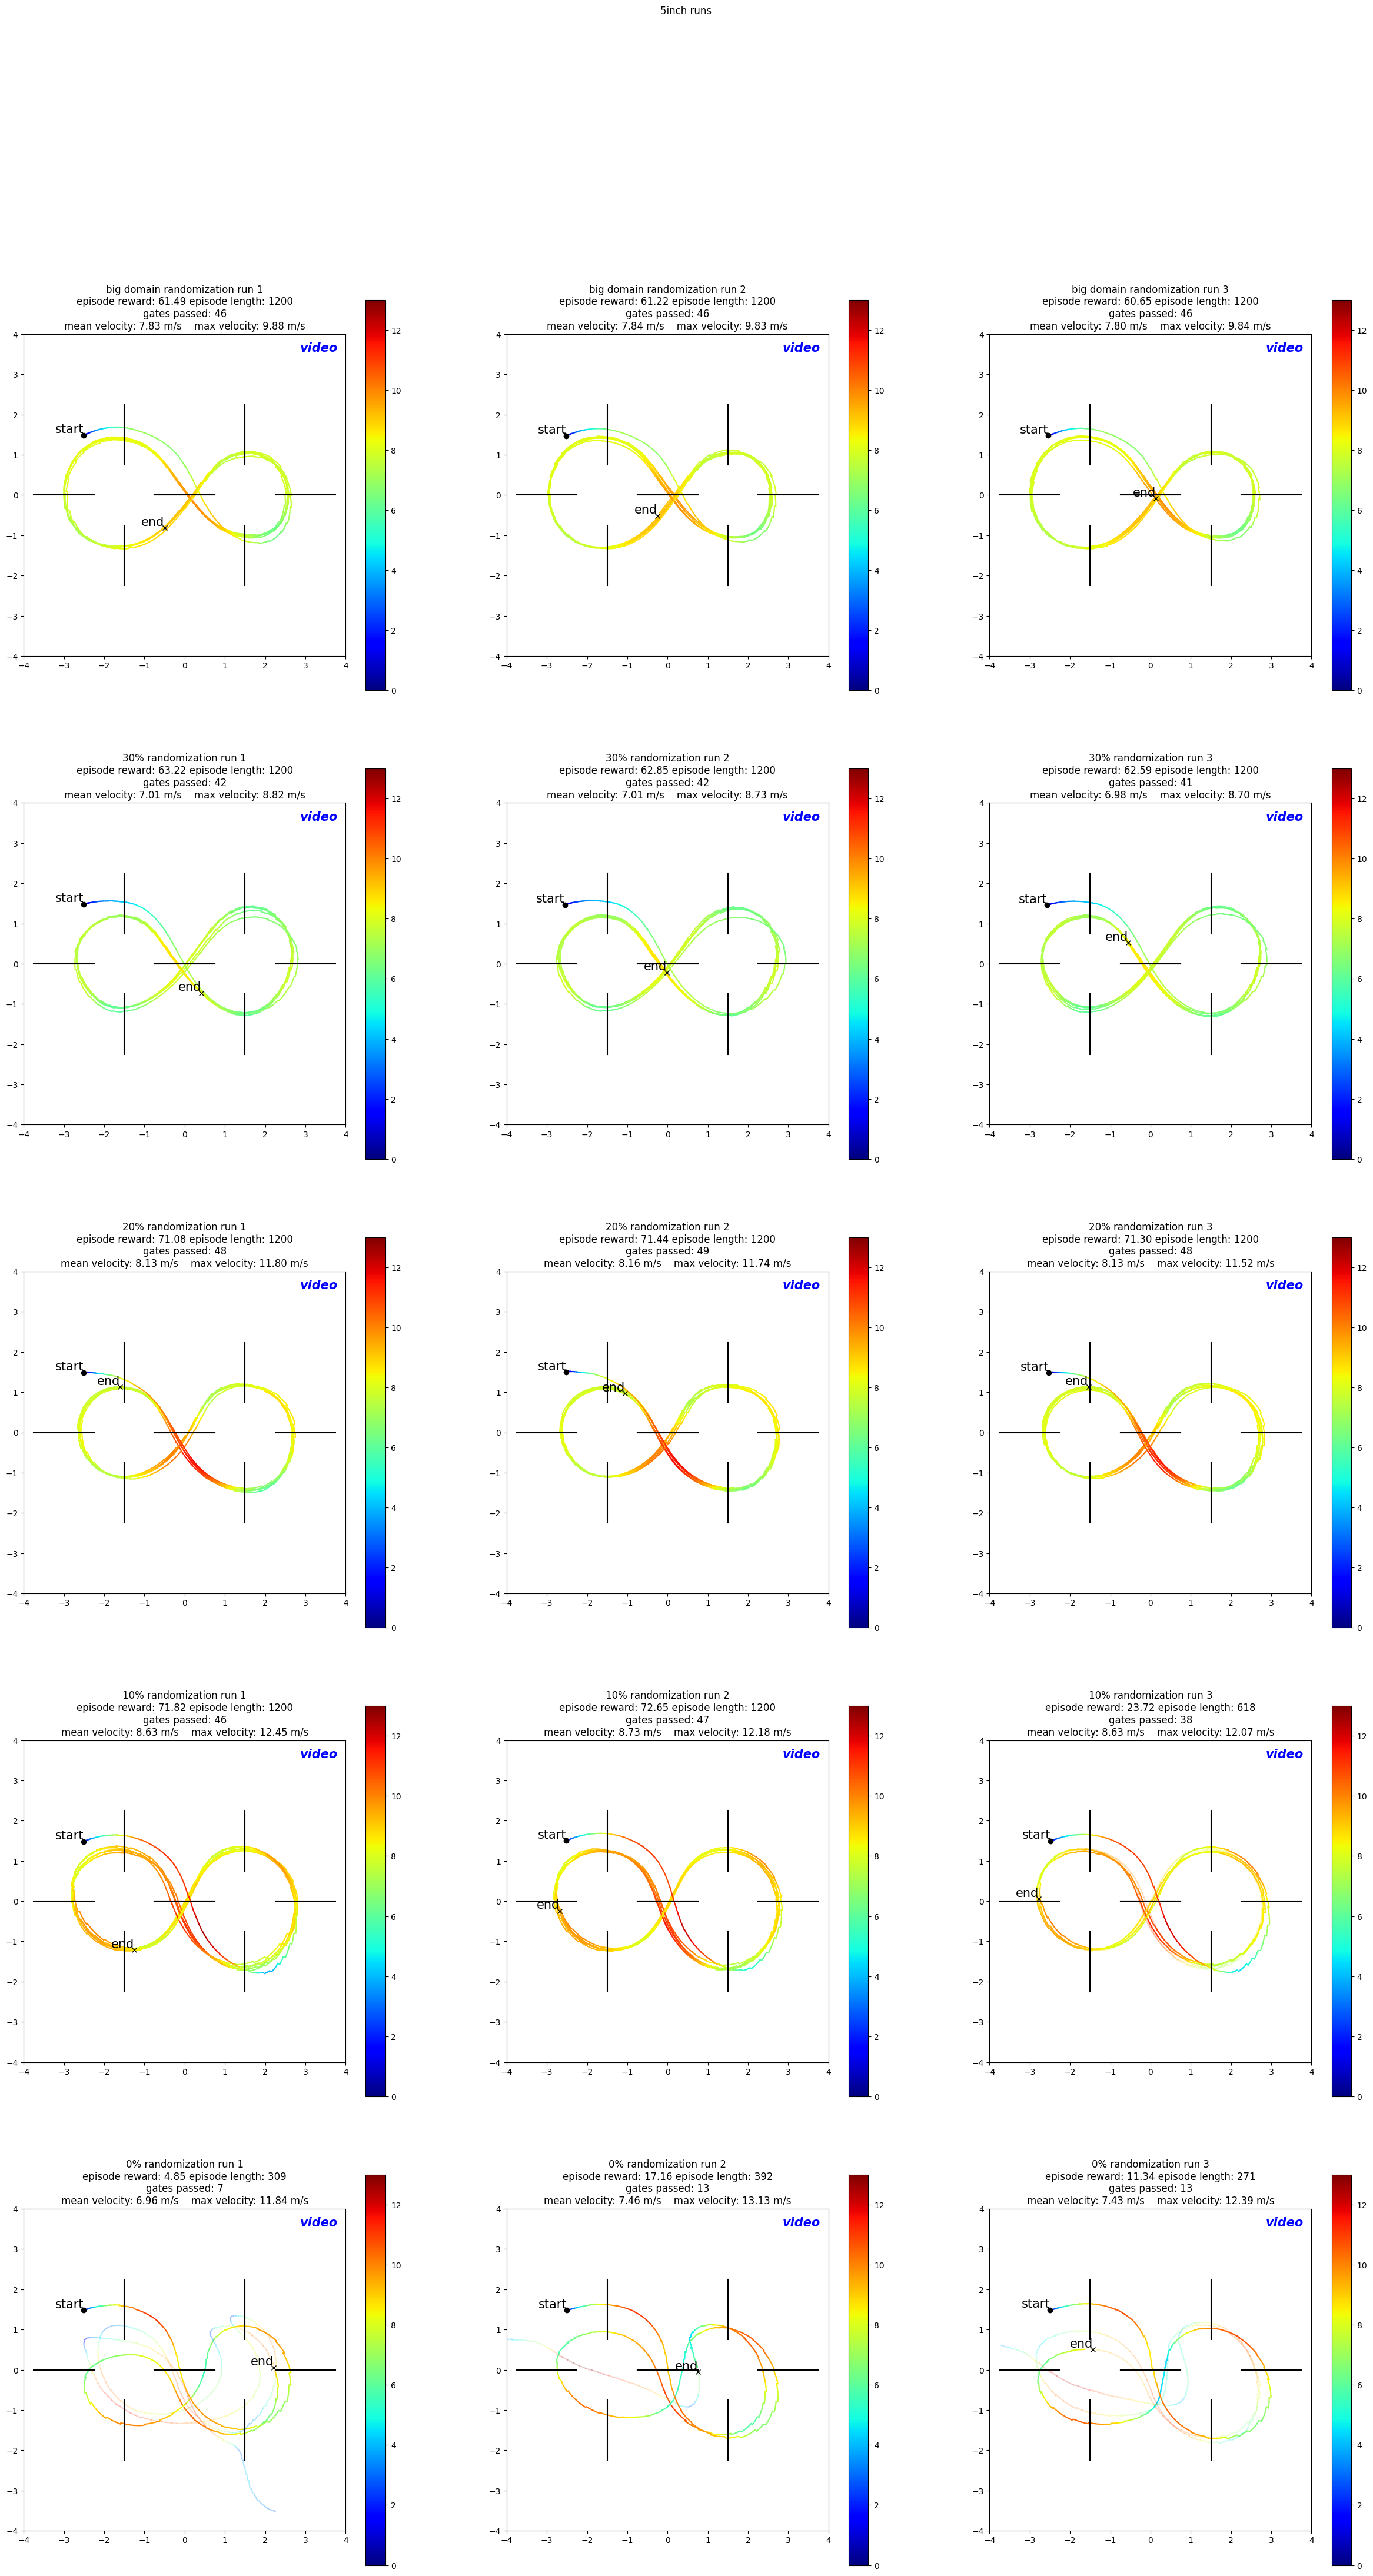

In [104]:
fig, axs = plt.subplots(5, 3, figsize=(30, 50))
run1, run2, run3 = runs_5inch_big_domain_randomization
# add link to the plot
xy_plot(axs[0, 0], run1, "big domain randomization run 1")
xy_plot(axs[0, 1], run2, "big domain randomization run 2")
xy_plot(axs[0, 2], run3, "big domain randomization run 3")
run1, run2, run3 = runs_5inch_30percent_randomization
xy_plot(axs[1, 0], run1, "30% randomization run 1")
xy_plot(axs[1, 1], run2, "30% randomization run 2")
xy_plot(axs[1, 2], run3, "30% randomization run 3")
run1, run2, run3 = runs_5inch_20percent_randomization
xy_plot(axs[2, 0], run1, "20% randomization run 1")
xy_plot(axs[2, 1], run2, "20% randomization run 2")
xy_plot(axs[2, 2], run3, "20% randomization run 3")
run1, run2, run3 = runs_5inch_10percent_randomization
xy_plot(axs[3, 0], run1, "10% randomization run 1")
xy_plot(axs[3, 1], run2, "10% randomization run 2")
xy_plot(axs[3, 2], run3, "10% randomization run 3")
run1, run2, run3 = runs_5inch_0percent_randomization
xy_plot(axs[4, 0], run1, "0% randomization run 1")
xy_plot(axs[4, 1], run2, "0% randomization run 2")
xy_plot(axs[4, 2], run3, "0% randomization run 3")

# title
fig.suptitle("5inch runs")

# colorbar
# put a little colorbar in each of the subplots
for ax in axs.flat:
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, orientation='vertical')
    
# video links
# big domain randomization
put_video_link(axs[0, 0], 'https://drive.google.com/file/d/1pBBlC3dwX-B-6tG-8m2ZF--Yak9D7tY5/view?usp=drive_link')
put_video_link(axs[0, 1], 'https://drive.google.com/file/d/178PXY13HzfILR_TpROyAfOfRukYk537K/view?usp=drive_link')
put_video_link(axs[0, 2], 'https://drive.google.com/file/d/1vPJd-N_kNjnk8G99j3spslk-JD6I_vMu/view?usp=drive_link')
# 30% randomization
put_video_link(axs[1, 0], 'https://drive.google.com/file/d/1c2m_SoHQlcMJu8EHlZM-DIBawKdOMv6I/view?usp=drive_link')
put_video_link(axs[1, 1], 'https://drive.google.com/file/d/1sGqmTATqxFm795Cz730j7_lmbuX-qHti/view?usp=drive_link')
put_video_link(axs[1, 2], 'https://drive.google.com/file/d/1qDeybCvLXS9uyx0SSAaIgQa5X85qi9OV/view?usp=drive_link')
# 20% randomization
put_video_link(axs[2, 0], 'https://drive.google.com/file/d/15RASVOAiFNgRgmeA4PK36g_WZaJnUINp/view?usp=drive_link')
put_video_link(axs[2, 1], 'https://drive.google.com/file/d/1Nx-TZyp4rNyRoBvMl5Aa90sWVp1UjkvJ/view?usp=drive_link')
put_video_link(axs[2, 2], 'https://drive.google.com/file/d/1c_Rii7uiI30bSOkfHpIkx3V_D10gli60/view?usp=drive_link')
# 10% randomization
put_video_link(axs[3, 0], 'https://drive.google.com/file/d/1RUf3Go9jP8UrTw6VUxo9c6uAg9GcM98I/view?usp=drive_link')
put_video_link(axs[3, 1], 'https://drive.google.com/file/d/1OiSgPmtRzhYrN675MXiKQamB8VlfWqCG/view?usp=drive_link')
put_video_link(axs[3, 2], 'https://drive.google.com/file/d/12M2K_kcf-k8UlPzhsLSFM-i7_I3ojUgf/view?usp=drive_link')
# 0% randomization
put_video_link(axs[4, 0], 'https://drive.google.com/file/d/1YLTWr7CkSrCfxqU_iKE1iBY5CEDnVaAy/view?usp=drive_link')
put_video_link(axs[4, 1], 'https://drive.google.com/file/d/16ZOa1r-7qx_6BploQf8GptX0J9XB2BRC/view?usp=drive_link')
put_video_link(axs[4, 2], 'https://drive.google.com/file/d/1wPyDUNK3f_IxUOb78N5_wxBXyiZTBkzs/view?usp=drive_link')

# save
fig.savefig("figures/5inch_runs.pdf")
fig.show()
